In [17]:
#Solving Universal Kepler Equation

import numpy as np
import matplotlib.pyplot as plt

def S_stumpff(z):
    if z > 0:
        s = (np.sqrt(z)-np.sin(np.sqrt(z)))/(np.sqrt(z))**3
    
    elif z < 0:
        s=(np.sinh(np.sqrt(-z))-np.sqrt(-z))/(np.sqrt(-z))**3
    else:
        s=1/6
    return(s)
def C_stumpff(z):
    if z > 0:
        c = (1-np.cos(np.sqrt(z)))/z
    elif z < 0:
        c = (np.cosh(np.sqrt(-z))-1)/(-z)
    else:
        c = 1/2
    return(c)
    
        
def Universal_Kepler(Dt,r0,vr0,alpha,mu):
    ratio=1
    X = np.sqrt(mu)*np.abs(alpha)*Dt
    
    print('Initial X',X)

    while np.abs(ratio) > 10**(-12):
        z = alpha*X**2
        Universal_F= (r0*vr0)/(np.sqrt(mu))*X**2*C_stumpff(z) + ((1-alpha*r0)*X**3*S_stumpff(z))+(r0*X)-(np.sqrt(mu)*Dt)
        Universal_F_dot = (r0*vr0)/(np.sqrt(mu)) * X*(1- (alpha*X**2* S_stumpff(z)))+(1-alpha*r0)*X**2*C_stumpff(z)+(r0)
        
        ratio=Universal_F/Universal_F_dot
        X = X-ratio
        print(X)
    return(X)


r0 is 6722.804474324685
1600 -7.35 5310 0.46 3800 2.47
alpha is 0.00014612760783556188
Initial X 295.22348342048736
294.42468147910574
294.42471353942875
294.4247135394288
X is 294.4247135394288
f,g -0.9484186605130325 -354.92818373297996
r_vec is [ 1091.25229362 -5199.37005184 -4480.66352377]
r_mag is 6949.865187005515
fdot, gdot are 0.00045326288193910444 -0.8847614070624317
v_vec is [ 7.22821695  1.99983566 -0.46296172]
UAP is 519.7730179154421


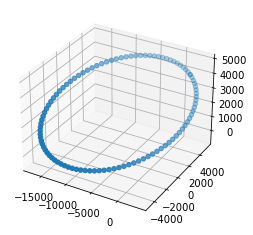

In [18]:
mu = 398600
Dt=3200
r0x, r0y, r0z, v0x, v0y,v0z = 1600,5310, 3800, -7.350,0.4600,2.470
rv = np.array([r0x,r0y,r0z,v0x,v0y,v0z])
r0 = np.sqrt(np.dot(rv[:3],rv[:3]))
print('r0 is',r0)
v0 = np.sqrt(np.dot(rv[3:],rv[3:]))
vr0 = np.dot(rv[:3],rv[3:])/r0

print(r0x,v0x,r0y,v0y,r0z,v0z)
alpha = (2/r0)-(v0**2/mu)
print('alpha is',alpha)
Universal_Anomaly = Universal_Kepler(Dt,r0,vr0,alpha,mu)
print('X is',Universal_Anomaly)
z60 = Universal_Anomaly**2*alpha
f = 1 - (Universal_Anomaly**2*C_stumpff(z60))/(r0) 
g = Dt - Universal_Anomaly**3*S_stumpff(z60)/np.sqrt(mu)

print('f,g',f,g)
r_vec = (f*rv[:3])+(g*rv[3:])
r_mag = np.sqrt(np.dot(r_vec,r_vec))
print('r_vec is', r_vec)
print('r_mag is',r_mag)

f_dot = np.sqrt(mu)*(alpha*Universal_Anomaly**3*S_stumpff(z60)-Universal_Anomaly)/(r_mag*r0)
g_dot = 1- (Universal_Anomaly**2/r_mag)*C_stumpff(z60)
print('fdot, gdot are',f_dot,g_dot)
v_vec = f_dot*rv[:3] + g_dot*rv[3:]
v_mag = np.sqrt(np.dot(v_vec,v_vec))
print('v_vec is',v_vec)
r_mag,v_mag, v_vec

Universal_Anomaly_period = np.sqrt(1/alpha)*2*np.pi
print('UAP is',Universal_Anomaly_period)
Chi= np.linspace(0,Universal_Anomaly_period,100)


r_0=[]

r_1=[]

r_2=[]
for i in range(len(Chi)):
    deltat=r0*v0*Chi[i]**2*C_stumpff(alpha*Chi[i]**2)/(mu) + (1-alpha*r0)*Chi[i]**3*S_stumpff(alpha*Chi[i]**2)/np.sqrt(mu)+ r0*Chi[i]/np.sqrt(mu)
    rzero = (1- Chi[i]**2*C_stumpff(alpha*Chi[i]**2)/r0)*rv[0] + (deltat - Chi[i]**3*S_stumpff(alpha*Chi[i]**2)/np.sqrt(mu))*rv[3]
    runo=(1- Chi[i]**2*C_stumpff(alpha*Chi[i]**2)/r0)*rv[1] + (deltat - Chi[i]**3*S_stumpff(alpha*Chi[i]**2)/np.sqrt(mu))*rv[4]
    rdue=(1- Chi[i]**2*C_stumpff(alpha*Chi[i]**2)/r0)*rv[2] + (deltat - Chi[i]**3*S_stumpff(alpha*Chi[i]**2)/np.sqrt(mu))*rv[5]

    r_0.append(rzero)
    r_1.append(runo)
    r_2.append(rdue)
    
r=np.transpose(np.array([r_0,r_1,r_2]))

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(r_0, r_1, r_2);


In [19]:
C_stumpff(4.5911)

0.33569762269521